In [1]:
'''House price regression Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques'''

'House price regression Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques'

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import sklearn
%matplotlib inline

In [150]:
import xgboost as xgb

In [4]:
data = pd.read_csv('/home/james/anaconda3/data/house_train.csv')

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
import seaborn as sns

/home/james/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


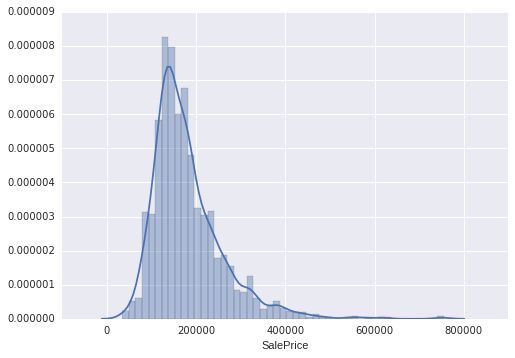

In [14]:
sns.distplot(data['SalePrice'])

In [15]:
data_dum = pd.get_dummies(data=data, dummy_na=True, drop_first=True)

In [16]:
data_dum.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,1,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,1,0,0,0,0,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,1,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,1,0,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,1,0,0,0,0,1,0,0


In [20]:
attributes = [col for col in data_dum.columns.values if col not in ['Id','SalePrice']]

In [32]:
data_dum.fillna(value=-1,inplace=True)

In [33]:
X = data_dum[attributes].as_matrix()

In [34]:
y = data_dum['SalePrice'].as_matrix()

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [35]:
X_n = sklearn.preprocessing.StandardScaler().fit_transform(X)
normalizer = sklearn.preprocessing.StandardScaler().fit(X)

In [86]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_n,y)

In [140]:
reg = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.0008, loss='huber',
                               max_depth=10, min_samples_split=0.005, subsample=0.85,
                               max_features=0.95, verbose=1)
'''reg = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.001, loss='huber',
                               max_depth=10, min_samples_split=0.005, subsample=0.85,
                               max_features=0.9, verbose=1)'''

"reg = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.001, loss='huber',\n                               max_depth=10, min_samples_split=0.005, subsample=0.85,\n                               max_features=0.9, verbose=1)"

In [210]:
reg1 = xgb.XGBRegressor(max_depth=3,learning_rate=0.01,n_estimators=2000,silent=False,
                        subsample=1, colsample_bytree=1, reg_alpha=0, reg_lambda = 1)

In [211]:
reg1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=2000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

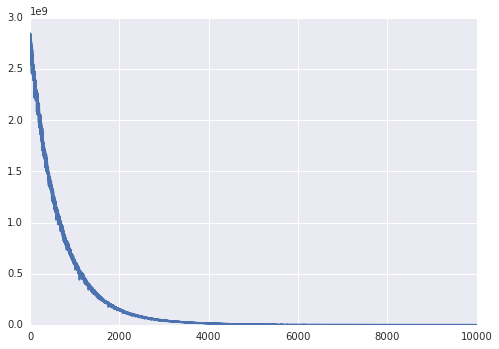

In [142]:
plt.plot(reg.train_score_)

In [48]:
from sklearn.metrics import mean_absolute_error

In [143]:
print('The MAE is : ', mean_absolute_error(y_test,reg.predict(X_test)))

The MAE is :  16499.5357724


In [212]:
print('The MAE is : ', mean_absolute_error(y_test,reg1.predict(X_test)))

The MAE is :  15352.0022581


In [58]:
test_data = pd.read_csv('/home/james/anaconda3/data/house_test.csv')

In [60]:
test_data_dum = pd.get_dummies(data=test_data, dummy_na=True, drop_first=True)

In [61]:
test_data_dum.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,1,0,0,0,0,1,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,1,0,0,0,0,1,0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,1,0,0,0,0,1,0,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,1,0,0,0,0,1,0,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,1,0,0,0,0,1,0,0


In [64]:
Missing = [col for col in list(data_dum.columns.values) if col not in list(test_data_dum.columns.values)]

In [72]:
test_full = pd.DataFrame(test_data_dum['Id'])
pd.options.mode.chained_assignment = None 
for col in attributes:
    if col in test_data_dum.columns.values:
        test_full[col] = test_data_dum[col]
    else:
        test_full[col] = 0
    

In [75]:
test_full.fillna(value=-1,inplace=True)

In [87]:
X_test_p = test_full[attributes].as_matrix()
X_test_n = normalizer.transform(X_test_p)

In [213]:
reg1.fit(X_n,y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=2000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [214]:
results = reg1.predict(X_test_n)

In [215]:
output = pd.DataFrame(test_data['Id'])
output['SalePrice'] = pd.Series(results)

In [216]:
output.head()

,Id,SalePrice
0,1461,125332.953125
1,1462,159076.359375
2,1463,178073.953125
3,1464,186417.921875
4,1465,188086.609375


In [217]:
output.to_csv('/home/james/anaconda3/data/house_res4.csv',index=False)